# Analyze the change of yieds with time relative to current yields

In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [2]:
#sub domain
# min_lon = -81.85 
# min_lat = 42.85
# max_lon = -81.65
# max_lat = 43.65 

ct_x=np.array([-94.75,-87.75,-81.25,-73.25])
ct_y=np.array([43.25,38.75,43.75,45.75])
ct_n=['A','B','C','D']
min_lon = ct_x-0.4 
min_lat = ct_y-0.4
max_lon = ct_x+0.4
max_lat = ct_y+0.4 
#cropped_ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon)

## Historical yields analysis

In [3]:
# ensemble members
fns='historical_yield_mai_noirr_files.txt'
files=pd.read_csv(fns,header=None)
files[0][0]

'clm45_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4'

In [4]:
files.size

16

In [5]:
# read ensemble members and calculate ensemble mean
Num=files.size
yields=np.empty((4,Num))
i0=0
for fn in files[0]:
    print(fn)
    ds=xr.open_dataset(fn,decode_times=False)
    for j in range(4):
        cropped_ds = ds.sel(lat=slice(max_lat[j],min_lat[j]),lon=slice(min_lon[j],max_lon[j]))
        yields[j,i0]=cropped_ds['yield-mai-noirr'][-20:].mean(dim='time')
    i0=i0+1
mean_yields=np.nanmean(yields,axis=1)
print(mean_yields.shape)


clm45_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_miroc5_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_miroc5_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
l

In [6]:
mean_yields

array([6.53931295, 6.43986992, 5.81925832, 6.26465726])

## future yield mean and standard deviation

In [7]:
fns='rcp60_2005soc_co2_yield_mai_noirr.txt'
files=pd.read_csv(fns,header=None)
files[0][0]

'clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4'

### future period 2040-2069

In [8]:
Num=files.size
models=files.copy()
yields1=np.empty((4,Num,94))
i0=0
for fn in files[0]:
    print(fn)
    models[0][i0]=models[0][i0].replace('_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4','')
    ds=xr.open_dataset(fn,decode_times=False)
    for j in range(4):
        cropped_ds = ds.sel(lat=slice(max_lat[j],min_lat[j]),lon=slice(min_lon[j],max_lon[j]))
        yields1[j,i0,:]=cropped_ds['yield-mai-noirr'][:,0,0]
    i0=i0+1

clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_hadgem2-es_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_ipsl-cm5a-lr_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_miroc5_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_gfdl-esm2m_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_hadgem2-es_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_ipsl-cm5a-lr_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_miroc5_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_gfdl-esm2m_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_hadgem2-es_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_ipsl-cm5a-lr_ewembi_rcp60_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_miroc5_ewembi_rcp60_2005soc_co2_yield-mai-noirr_gl

In [9]:
cropped_ds

<xarray.Dataset>
Dimensions:          (lon: 1, lat: 1, time: 94)
Coordinates:
  * lon              (lon) float32 -73.25
  * lat              (lat) float32 45.75
  * time             (time) float64 345.0 346.0 347.0 ... 436.0 437.0 438.0
Data variables:
    yield-mai-noirr  (time, lat, lon) float32 ...
Attributes:
    CDI:                          Climate Data Interface version 1.8.0 (http:...
    history:                      Created Fri Oct 27 04:28:09 2017 @Eawag By ...
    institution:                  Eawag
    Conventions:                  CF-1.6
    description:                  PEPIC simulated Yield between 2006 and 2099
    contact:                      Wenfeng Liu <wenfeng.liu@eawag.ch> & Hong Y...
    isimip_round:                 ISIMIP2b
    isimip_upload_date:           27. Okt 04:28
    isimip_upload_version:        1
    isimip_qc_version:            1
    CDO:                          Climate Data Operators version 1.8.0 (http:...
    isimip_test_suite_pass_date:  2017.10.27

In [10]:
models

,0
0,clm45_gfdl-esm2m
1,clm45_hadgem2-es
2,clm45_ipsl-cm5a-lr
3,clm45_miroc5
4,gepic_gfdl-esm2m
5,gepic_hadgem2-es
6,gepic_ipsl-cm5a-lr
7,gepic_miroc5
8,lpjml_gfdl-esm2m
9,lpjml_hadgem2-es


In [33]:
type(models)

pandas.core.frame.DataFrame

In [11]:
rate=np.empty((4,16,94))
rate10=np.empty((4,16,94))

for i in range(16):
    for j in range(4):
        rate[j,i,:]=yields1[j,i,:]/yields[j,i]-1
        kernel_size = 10
        kernel = np.ones(kernel_size) / kernel_size
        rate10[j,i,:] = np.convolve(rate[j,i,:], kernel, mode='same')
np.save('rate10.npy',rate10)

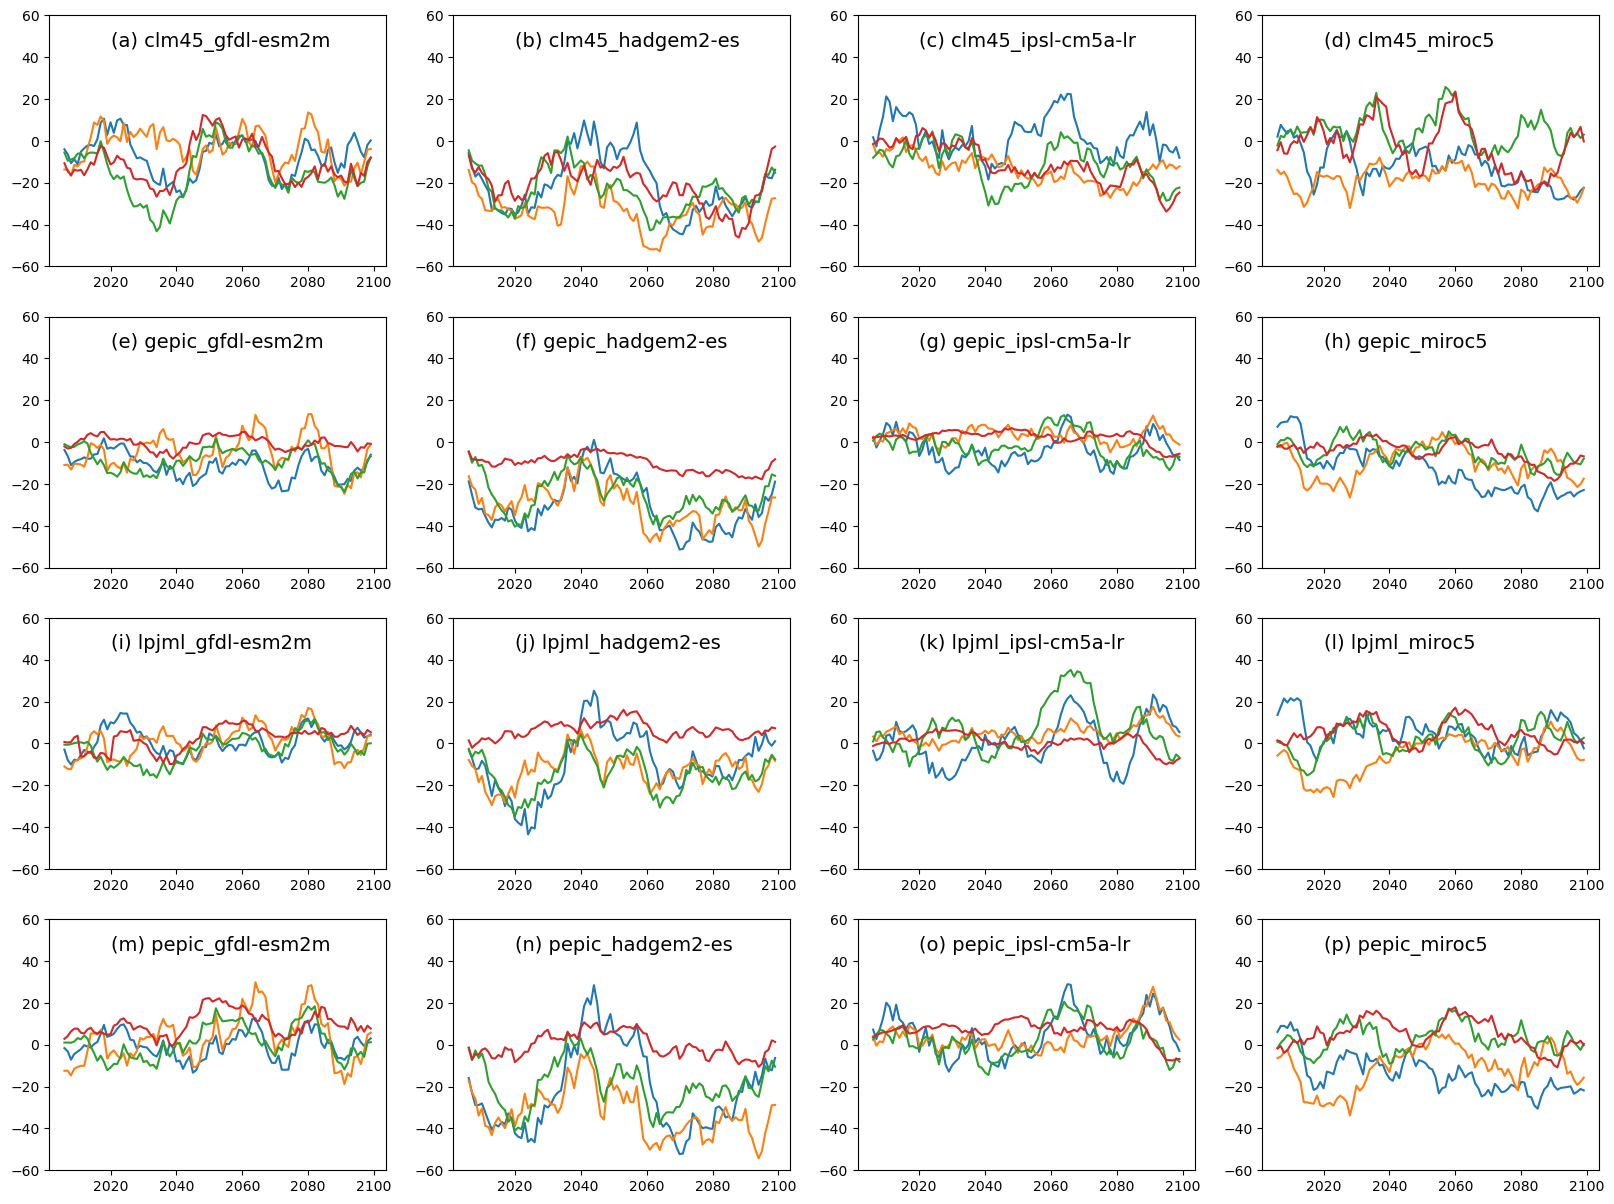

In [24]:
time=np.array(range(94))+2006
fig=plt.figure(figsize=(20,15))
abc='abcdefghijklmnopqrstuvwxyz'
for i in range(16):
    plt.subplot(5,5,i+1)
    for j in range(4):
        plt.plot(time,rate10[j,i,:]*100)
#    trend = np.polyfit(time,rate10[i,:]*100,1)
#     trendpoly = np.poly1d(trend)
#     plt.plot(time,trendpoly(time))
        plt.ylim([-60,60])
    
    plt.text(2020,45,'('+abc[i]+') '+models[0][i], fontsize=14)

plt.show()
fig.savefig('yields_time_series/Yields_Trend_2006-2099_16models_at_4gridcells.png',dpi=150)

In [22]:
rate5x5=np.empty((4,5,5,94))
#get 4x4 matrix
for i1 in range(4):
    for i2 in range(4):
        ij=i1*4+i2
        rate5x5[:,i1,i2,:]=rate10[:,ij,:]

rate5x5[:,4,:4,:]=np.mean(rate5x5[:,:4,:4,:],axis=1)
rate5x5[:,:4,4,:]=np.mean(rate5x5[:,:4,:4,:],axis=2)
rate5x5[:,4,4,:]=np.mean(rate5x5[:,:4,4,:],axis=1)    


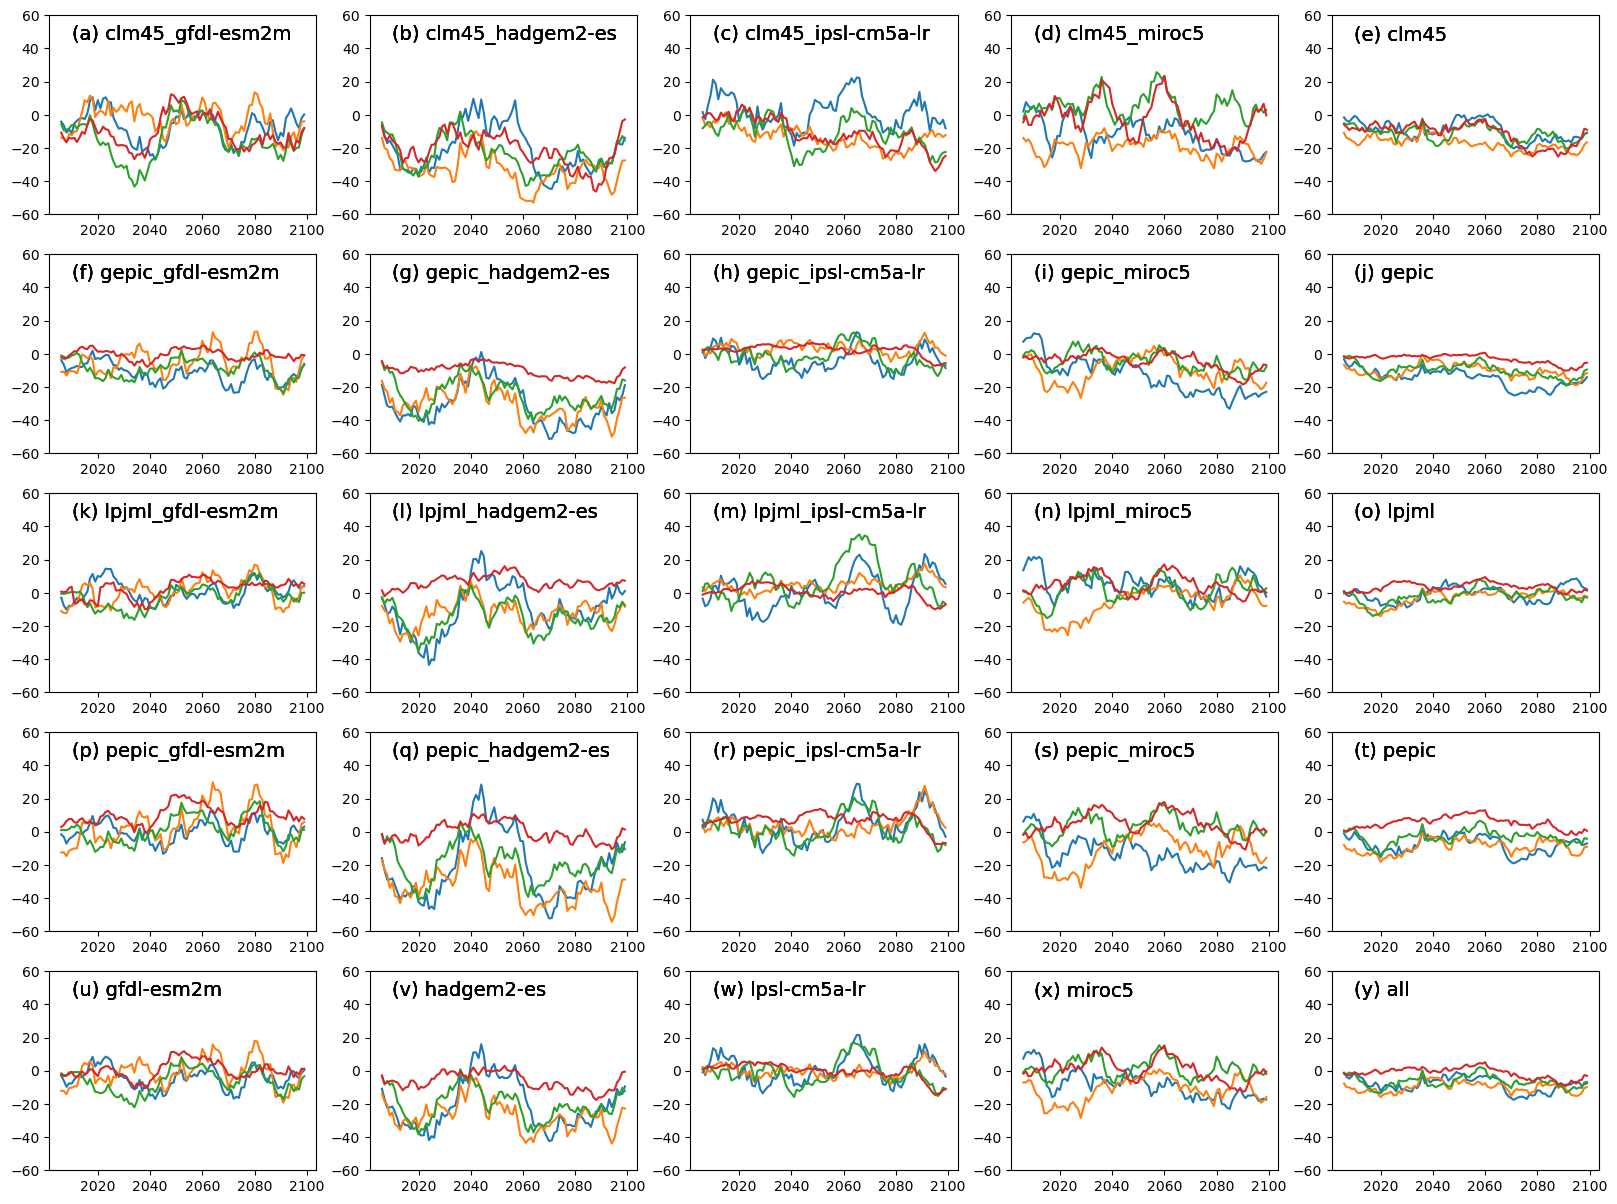

In [37]:
time=np.array(range(94))+2006
fig=plt.figure(figsize=(20,15))
abc='abcdefghijklmnopqrstuvwxyz'

for i1 in range(5):
    for i2 in range(5):
        if i1<4:
            if i2<4:
                ij=i1*4+i2
        plt.subplot(5,5,i1*5+i2+1)
        for j in range(4):
            plt.plot(time,rate5x5[j,i1,i2,:]*100)
            plt.ylim([-60,60])
#             if i1==4:
#                 plt.ylim([-30,30])
#             if i2==4:
#                 plt.ylim([-30,30])
            if i1<4:
               if i2<4:
                plt.text(2010,45,'('+abc[i1*5+i2]+') '+models[0][ij], fontsize=14)
            if i2==4:
                if i1<4:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+models[0][ij].replace('_miroc5',''), fontsize=14)
            if i1==4:
                if i2==0:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+'gfdl-esm2m', fontsize=14)
                if i2==1:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+'hadgem2-es', fontsize=14)
                if i2==2:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+'lpsl-cm5a-lr', fontsize=14)
                if i2==3:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+'miroc5', fontsize=14)
                if i2==4:
                    plt.text(2010,45,'('+abc[i1*5+i2]+') '+'all', fontsize=14)                    
plt.show()
fig.savefig('yields_time_series/figure2_Yields_Trend_2006-2099_16models_at_4gridcells.png',dpi=150)

In [ ]:
## calculate variance about (4,5,5,94)

In [39]:
### calculate deriavation relative to all model average year by year for the 4 grids
drate_crops=np.empty((4,4,94))
drate_climate=np.empty((4,4,94))
for i1 in range(4): #crop models
    drate_crops[:,i1,:]=rate5x5[:,i1,4,:]-rate5x5[:,4,4,:]
    drate_climate[:,i1,:]=rate5x5[:,4,i1,:]=rate5x5[:,4,4,:]


In [67]:
### calculate averte for the last 30 years
mdrate_crops=np.mean(drate_crops[:,:,-30:],axis=2)
mdrate_climate=np.mean(drate_climate[:,:,-30:],axis=2)

In [68]:
vdrate_crops=np.sum(mdrate_crops*mdrate_crops)/4
vdrate_climate=np.sum(mdrate_climate*mdrate_climate)/4

In [69]:
[np.mean(vdrate_crops),np.mean(vdrate_climate)]

[0.022403412300346596, 0.03661757551379609]

In [70]:
mdrate_crops

array([[-0.0370022 , -0.08735917,  0.11494815,  0.00941322],
       [-0.09885492, -0.02245849,  0.10218214,  0.01913128],
       [-0.06273003, -0.05233916,  0.07174957,  0.04331962],
       [-0.14282831, -0.01199101,  0.07726241,  0.07755692]])

In [71]:
mdrate_climate

array([[-0.11999075, -0.11999075, -0.11999075, -0.11999075],
       [-0.11211498, -0.11211498, -0.11211498, -0.11211498],
       [-0.0827555 , -0.0827555 , -0.0827555 , -0.0827555 ],
       [-0.05292971, -0.05292971, -0.05292971, -0.05292971]])

In [72]:
vdrate_crops

0.022403412300346596